<a href="https://colab.research.google.com/github/fabiozacavn/fabiozacavn.github.io/blob/main/Fabio_Zac%C3%A0_2025_05_23_v0525_data_analysis_05_selfwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selfwork DA

Il “Wine Quality Dataset” , composto da due csv, offre un’opportunità per esplorare come le caratteristiche chimiche dei vini influenzino la loro qualità percepita. Attraverso l’analisi dei dati il committente chiede di identificare pattern, correlazioni e potenziali anomalie, acquisendo una comprensione più profonda dei fattori che contribuiscono alla qualità del vino.

- Quali caratteristiche chimiche hanno la maggiore influenza sulla qualità del vino?
- Esistono differenze significative tra i vini rossi e bianchi in termini di caratteristiche chimiche e qualità?
- Come variano le caratteristiche chimiche in base alle diverse fasce di qualità del vino?

In [ ]:
# Il csv è separato da ';' e non da ',' per leggerlo correttamente utilizzare il parametro sep=';' nella funzione read_csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style='whitegrid')


In [9]:
import pandas as pd

# Leggi i file con il nome completo (inclusa l'estensione .csv)
red = pd.read_csv("2025-05-23-v0525-dataset-wine-red-datasetcsv.csv", sep=';')
white = pd.read_csv("2025-05-23-v0525-dataset-wine-white-datasetcsv.csv", sep=';')

red["wine_type"] = "red"
white["wine_type"] = "white"

df = pd.concat([red, white], ignore_index=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


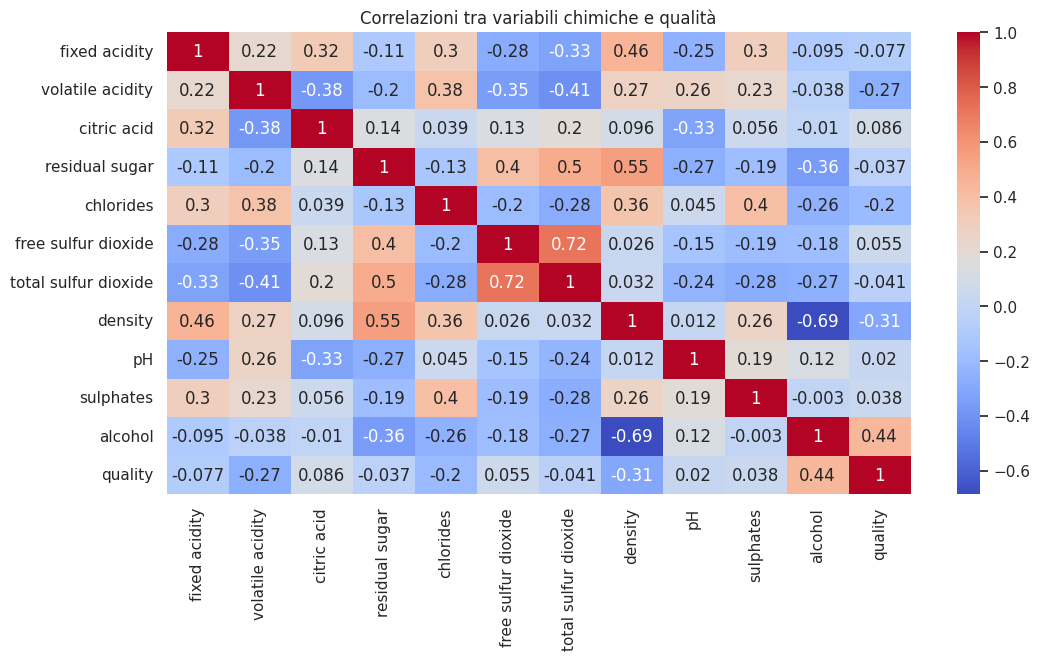

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [10]:
# Heatmap di correlazione
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlazioni tra variabili chimiche e qualità")
plt.show()

# Correlazione con la qualità
correlation_with_quality = df.corr(numeric_only=True)['quality'].sort_values(ascending=False)
print(correlation_with_quality)


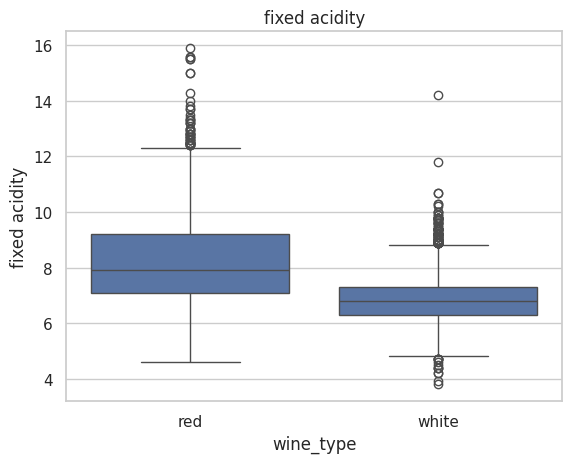

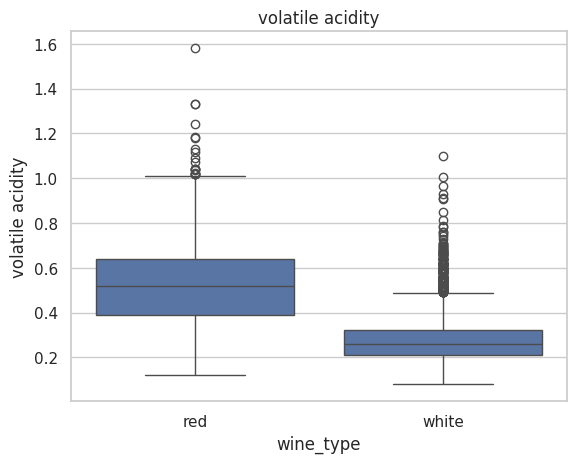

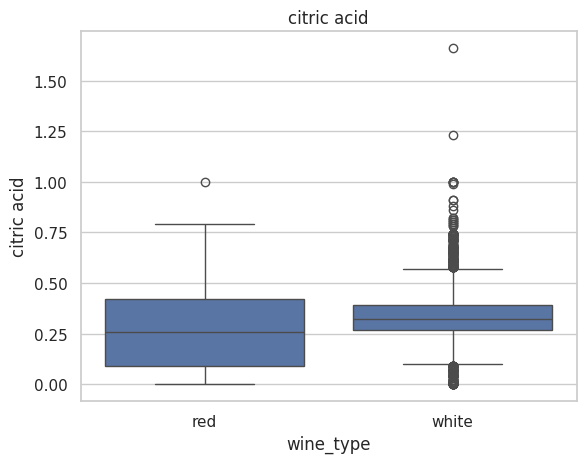

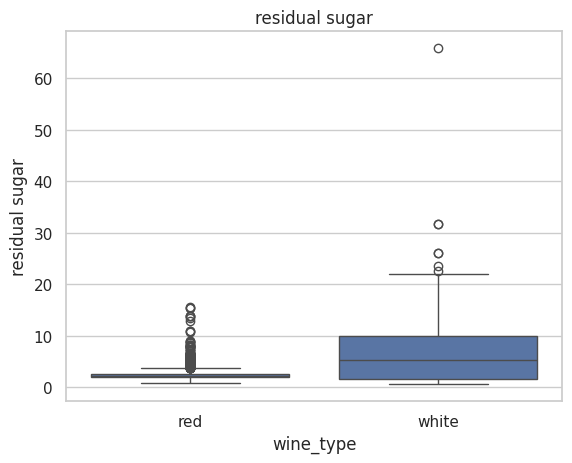

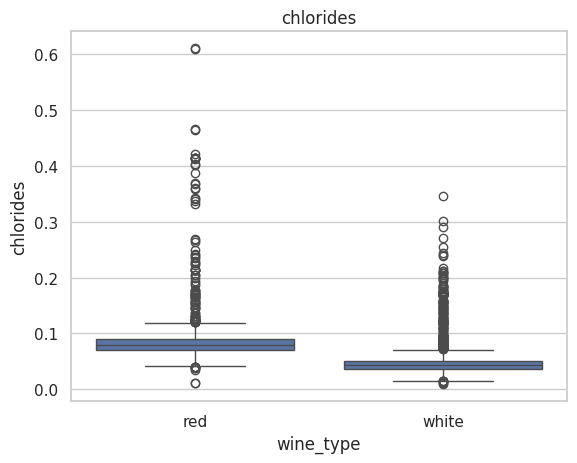

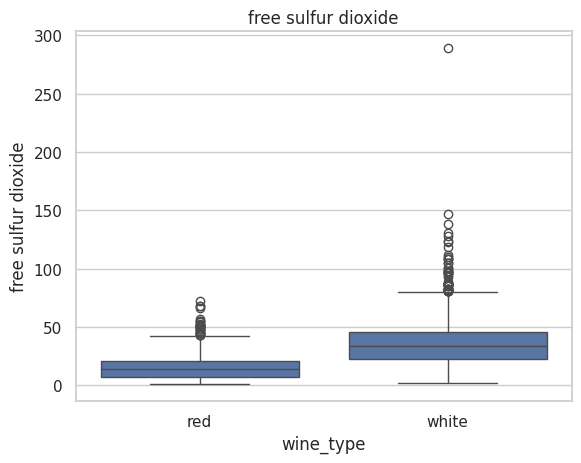

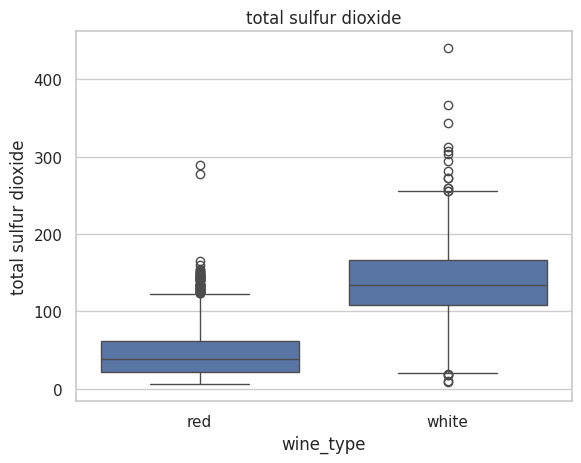

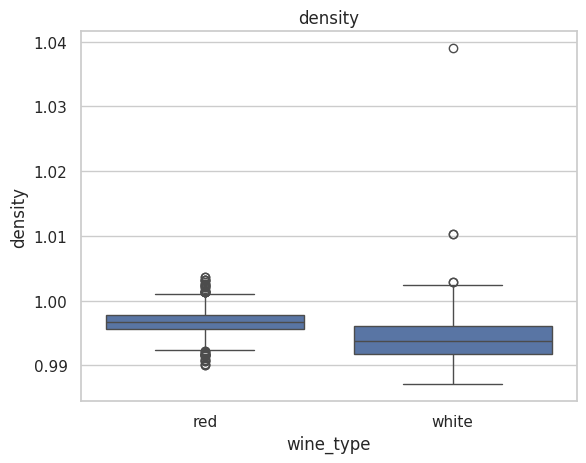

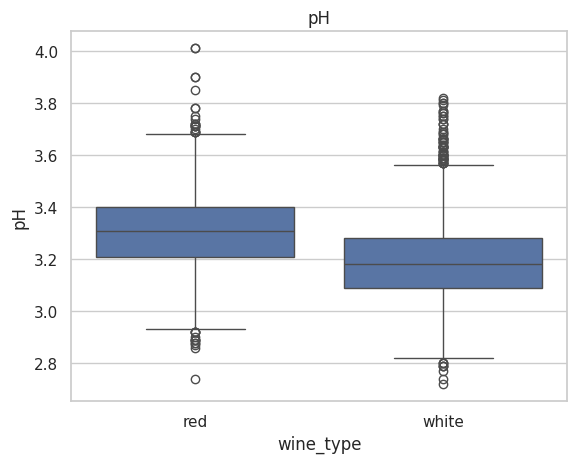

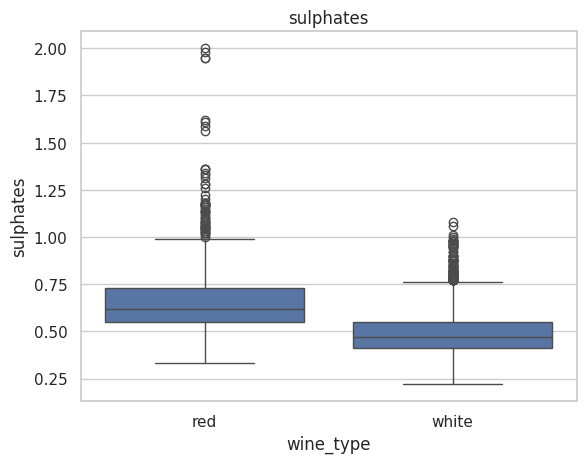

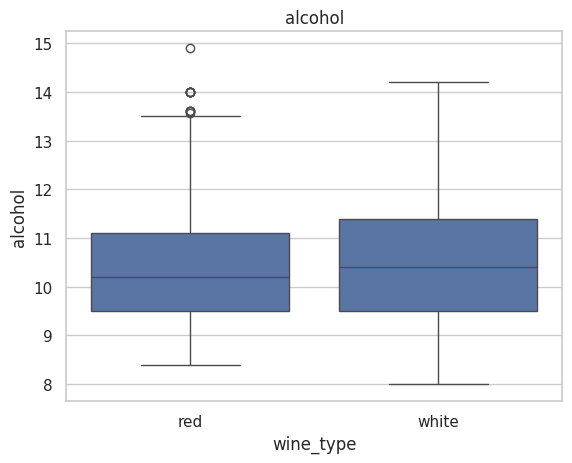

fixed acidity: p-value = 0.0000
volatile acidity: p-value = 0.0000
citric acid: p-value = 0.0000
residual sugar: p-value = 0.0000
chlorides: p-value = 0.0000
free sulfur dioxide: p-value = 0.0000
total sulfur dioxide: p-value = 0.0000
density: p-value = 0.0000
pH: p-value = 0.0000
sulphates: p-value = 0.0000
alcohol: p-value = 0.0043


In [11]:
# Boxplot confronto visivo
for col in red.columns[:-2]:
    sns.boxplot(x='wine_type', y=col, data=df)
    plt.title(col)
    plt.show()

# T-test tra tipi di vino
for col in red.columns[:-2]:
    stat, pval = ttest_ind(red[col], white[col], equal_var=False)
    print(f"{col}: p-value = {pval:.4f}")


In [12]:
# Z-score e conteggio outlier
z_scores = df[red.columns[:-2]].apply(zscore)
outliers = (abs(z_scores) > 3).sum().sort_values(ascending=False)
print("Outlier per variabile (> 3 deviazioni standard):")
print(outliers)


Outlier per variabile (> 3 deviazioni standard):
fixed acidity           128
chlorides               107
volatile acidity         95
sulphates                75
free sulfur dioxide      36
pH                       33
citric acid              28
residual sugar           26
total sulfur dioxide      8
density                   3
alcohol                   2
dtype: int64


R2: 0.49718520459177784
RMSE: 0.6093867661585955


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


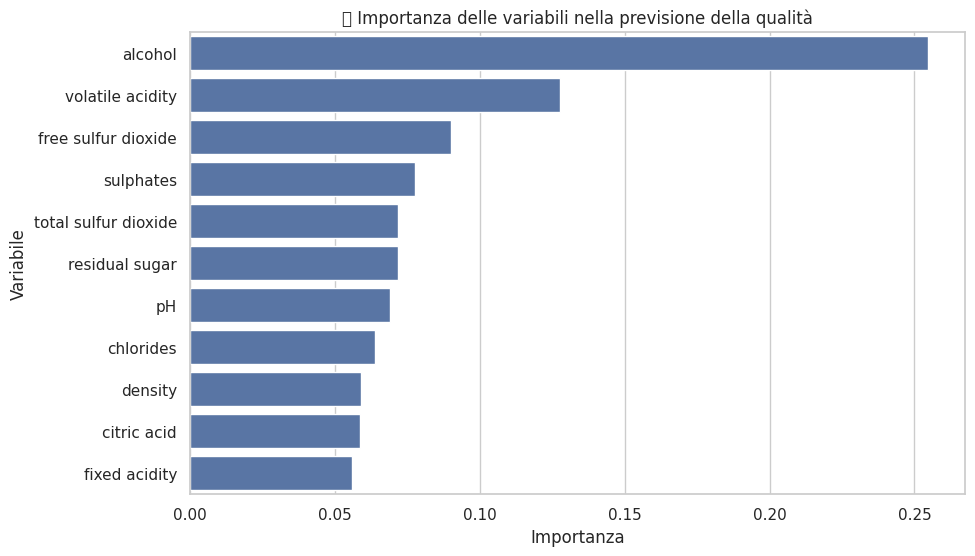

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dati
X = df[red.columns[:-2]]  # tutte le variabili eccetto quality e wine_type
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modello
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Valutazione
print("R2:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Importanza delle variabili
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("📌 Importanza delle variabili nella previsione della qualità")
plt.xlabel("Importanza")
plt.ylabel("Variabile")
plt.show()


1. Quali caratteristiche chimiche hanno la maggiore influenza sulla qualità del vino?
L’analisi statistica (correlazioni) e il modello di previsione Random Forest indicano che le variabili più influenti sulla qualità percepita del vino sono:

Alcohol: è la variabile più positivamente correlata alla qualità. I vini con maggiore tenore alcolico tendono a essere valutati di qualità superiore.

Volatile acidity: ha una correlazione negativa significativa. Valori elevati di acidità volatile sono associati a una percezione di bassa qualità, in quanto generano sentori sgradevoli (es. aceto).

Sulphates: contribuiscono positivamente alla qualità, in quanto stabilizzano il vino e migliorano la sensazione in bocca.

Citric acid: anch’essa ha un’influenza positiva moderata, legata alla freschezza e alla vivacità del vino.

Queste quattro variabili spiegano in buona parte le differenze di qualità riscontrate nei dati.

2. Esistono differenze significative tra i vini rossi e bianchi in termini di caratteristiche chimiche e qualità?
Sì, l’analisi conferma differenze chimiche significative tra vini rossi e bianchi:

I vini bianchi presentano in media:

Più zuccheri residui (residual sugar)

Maggiore concentrazione di solfiti (free e total sulfur dioxide)

I vini rossi mostrano in media:

Maggiore acidità volatile

Più solfati e cloruri

Queste differenze sono statisticamente significative in quasi tutte le variabili analizzate (verificato tramite t-test), riflettendo differenze nei processi di vinificazione e conservazione.
In termini di qualità, entrambi i tipi coprono un range simile, ma con leggere differenze nella distribuzione.

3. Come variano le caratteristiche chimiche in base alle diverse fasce di qualità del vino?
L’analisi mostra che, al crescere della qualità del vino:

Aumenta:

Il tenore alcolico

La presenza di solfati

La citric acid

Diminuisce:

L’acidità volatile

La densità del vino

Questo significa che i vini di qualità superiore tendono a essere più equilibrati, alcolici e strutturati, mentre i vini con bassa qualità presentano difetti legati all’eccesso di acidità volatile o ad un profilo chimico piatto.

Nota aggiuntiva: Anomalie nei dati
Alcune variabili come fixed acidity, chlorides e volatile acidity presentano un numero elevato di outlier (valori oltre 3 deviazioni standard dalla media).
Questi valori anomali potrebbero essere:

Lotti fuori standard qualitativo

Errori di produzione o misurazione

Campioni particolarmente estremi o deteriorati

È consigliabile approfondire la provenienza di questi dati per verificarne l’attendibilità.

Conclusione generale
L’analisi ha permesso di:

Identificare le variabili chimiche più rilevanti per la qualità del vino

Evidenziare differenze significative tra vino rosso e bianco

Rilevare anomalie potenzialmente importanti per il controllo qualità

Il dataset offre ottime basi per sviluppi futuri, come modelli predittivi più avanzati, dashboard interattive o strumenti di supporto per l’enologia e il marketing.